#Laboratorio 2
###Nombre: Jhamil Crespo Rejas
###Carrera: Ingenieria en Ciencias de la Computacion
Carga de datos e importacion de librerias necesarias




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

El dataset contiene casi 80 mil filas y 21 columnas. Cargamos solo el 80% de las filas del dataset para entrenar al modelo. Para X tenemos 20 columnas y para Y solo una, que es la segunda columna

In [3]:
# Cargar datos
import numpy as np

with open('/content/drive/MyDrive/american_bankruptcy(cambiado1).csv', 'r', encoding='utf-8-sig') as f:
    data = np.loadtxt(f, delimiter=',')
X, y = data[1:62401, np.r_[0, 2:21]], data[1:62401, 1]
print(X)
print(y)

[[1.100000e+01 2.000000e+03 4.858560e+02 ... 8.742550e+02 3.616420e+02
  8.098880e+02]
 [1.100000e+01 2.001000e+03 4.366560e+02 ... 6.387210e+02 3.999640e+02
  6.115140e+02]
 [1.100000e+01 2.002000e+03 3.964120e+02 ... 6.063370e+02 3.916330e+02
  5.755920e+02]
 ...
 [1.670800e+04 2.009000e+03 1.203900e+01 ... 2.968100e+01 1.125400e+01
  3.335200e+01]
 [1.670900e+04 2.000000e+03 1.649400e+02 ... 8.270100e+01 3.270000e+02
  1.368210e+02]
 [1.670900e+04 2.001000e+03 2.347730e+02 ... 3.571390e+02 1.060422e+03
  4.147430e+02]]
[1. 1. 1. ... 1. 1. 1.]


Hacemos la grafica de los puntos

In [4]:
def plotData(X, y):
    # Gragica los puntos de datos X y y en una nueva figura. Grafica los puntos de datos con * para los positivos y
    # o para los negativos.

    # Crea una nueva figura
    fig = pyplot.figure()

    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0

    # Plot Examples
    pyplot.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    pyplot.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)


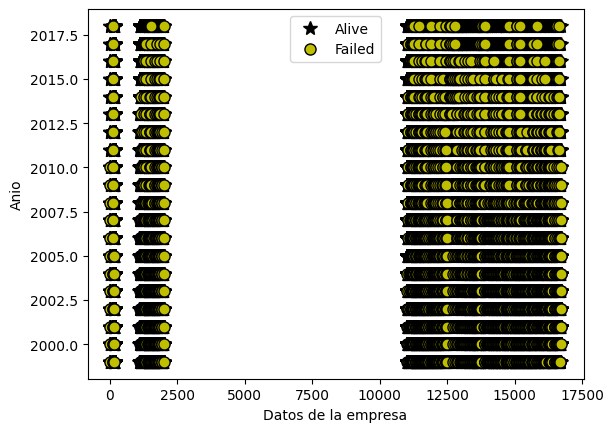

In [5]:
plotData(X, y)
# adiciona etiquetas para los ejes
pyplot.xlabel('Datos de la empresa')
pyplot.ylabel('Anio')
pyplot.legend(['Alive', 'Failed'])
pass

Definimos la funcion sigmoide, esta funcion nos permite convertir los numeros en valores entre 0 y 1 y asi poder modelar probabilidades

In [6]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [7]:
# Prueba la implementacion de la funcion sigmoid
z = 21
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 21 ) =  0.9999999992417439


Concatenamos la columna de unos a X

In [8]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X], axis=1)

Definimos la funcion para calcular el costo

In [9]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

Definimos la funcion del descenso por el Gradiente para encontrar los parametros theta que minimizan el costo de las predicciones

In [10]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

Cargamos el otro 20% del dataset y concatenamos una columna de unos al X_test

In [14]:
X_test, y_test = data[62401:, np.r_[0, 2:21]], data[62401:, 1]
m, n = X_test.shape
X_test = np.concatenate([np.ones((m, 1)), X_test], axis=1)

LLamamos a la funcion del descenso por el gradiente con un total de 2000 iteraciones y probamos el modelo con el 20% del dataset. Tambien graficamos la convergencia del costo

<ipython-input-9-9bf1ce321844>:7: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
<ipython-input-6-22f640bc02db>:8: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-z))


Se han truncado las últimas 5000 líneas del flujo de salida.
Fila 11281: la empresa continua vigente con 1 y entra en bancarrota con 0 (usando el descenso por el gradiente): 1
Fila 11282: la empresa continua vigente con 1 y entra en bancarrota con 0 (usando el descenso por el gradiente): 1
Fila 11283: la empresa continua vigente con 1 y entra en bancarrota con 0 (usando el descenso por el gradiente): 1
Fila 11284: la empresa continua vigente con 1 y entra en bancarrota con 0 (usando el descenso por el gradiente): 1
Fila 11285: la empresa continua vigente con 1 y entra en bancarrota con 0 (usando el descenso por el gradiente): 1
Fila 11286: la empresa continua vigente con 1 y entra en bancarrota con 0 (usando el descenso por el gradiente): 1
Fila 11287: la empresa continua vigente con 1 y entra en bancarrota con 0 (usando el descenso por el gradiente): 1
Fila 11288: la empresa continua vigente con 1 y entra en bancarrota con 0 (usando el descenso por el gradiente): 1
Fila 11289: la empr

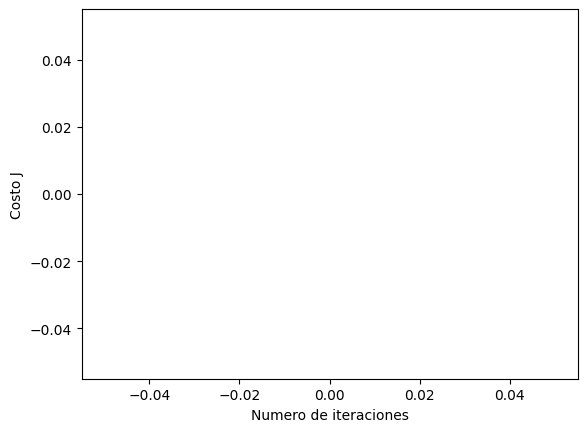

In [16]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(21)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar si ingresa o no a la universidad
predicciones = []
for X_array in X_test:
    aprueba = sigmoid(np.dot(X_array, theta))
    predicciones.append(aprueba)

print('Las predicciones para todas las filas en X_test son:')
for i, pred in enumerate(predicciones):
    print('Fila {}: la empresa continua vigente con 1 y entra en bancarrota con 0 (usando el descenso por el gradiente): {:.0f}'.format(i, pred))

# verificar si ingresa o no a la universidad
#X_array = [1, 18971.000, 2018.000,82.589,68.817,65.201,67.262,2.112,-50.946,45.839,354.179,160.513,1625.370,632.122,2.061,91.696,79.365,84.995,160.513,712.687,93.251]
#aprueba = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

#print('la empresa continua vigente con 1 y entra en bancarrota con 0 (usando el descenso por el gradiente):{:.0f}'.format(aprueba))

Definimos la funcion predict que toma los parametros del modelo y las X's y devuelve las predicciones

In [17]:
def predict(theta, X):
    """
    Predecir si la etiqueta es 0 o 1 mediante regresión logística aprendida.
    Calcula las predicciones para X usando un umbral en 0.5 (es decir, si sigmoide (theta.T * x)> = 0.5, predice 1)

    Parametros
    ----------
    theta : array_like
        Parametros para regresion logistica. Un vecto de la forma (n+1, ).

    X : array_like
        Datos utilizados para el calculo de las predicciones.
        La fila es el numero de los puntos para calcular las predicciones,
        y las columnas con el numero de caracteristicas.

    Devuelve
    -------
    p : array_like
        Predicciones y 0 o 1 para cada fila en X.
    """
    m = X.shape[0] # Numero de ejemplos de entrenamiento

    p = np.zeros(m)

    p = np.round(sigmoid(X.dot(theta.T)))
    return p

In [18]:
#  Predice la probabilidad de ingreso para un estudiante con nota de 45 en el examen 1 y nota de 85 en el examen 2
prob = sigmoid(np.dot([1, 18971.000, 2018.000,82.589,68.817,65.201,67.262,2.112,-50.946,45.839,354.179,160.513,1625.370,632.122,2.061,91.696,79.365,84.995,160.513,712.687,93.251], theta))
print('Para una empresa con esas caracteristicas se predice una probabilidad de no bancarrota de: {:.3f}%'.format(prob))

# Compute accuracy on our training set
p = predict(theta, X)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y) * 100))

Para una empresa con esas caracteristicas se predice una probabilidad de no bancarrota de: 1.000%
Precisión de entrenamiento: 85.47 %


<ipython-input-6-22f640bc02db>:8: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-z))
